All expense Records
('2025-06-08', 'Food', 'Smoothie', 55.0)
('2025-06-08', 'Transport', 'Train Ticket', 30.0)
('2025-06-08', 'Study', 'Notebook', 20.0)
('2025-06-08', 'Entertainment', 'Netflix', 100.0)
('2025-06-08', 'Food', 'Lunch', 70.0)
Sum of expenses by category
Entertainment: 100.0 THB
Food: 125.0 THB
Study: 20.0 THB
Transport: 30.0 THB


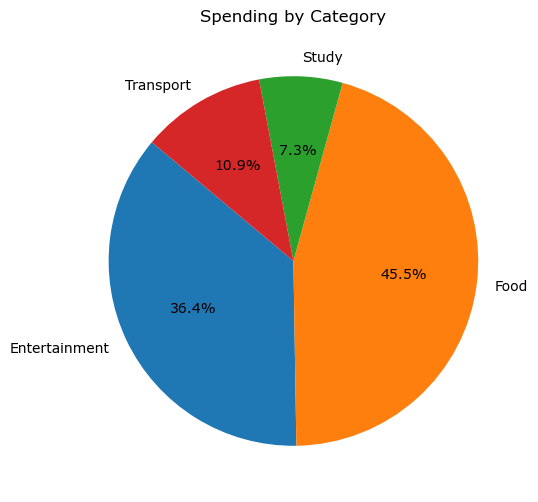

In [4]:
import sqlite3

# Connect to a new SQLite database file (or existing one)
conn = sqlite3.connect("expenses.db")
cursor = conn.cursor()
import sqlite3

# Create the expenses table
cursor.execute("""
CREATE TABLE IF NOT EXISTS expenses (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    date TEXT,
    category TEXT,
    description TEXT,
    amount REAL
)
""")
conn.commit()


# Check if table is empty, then insert sample data
# This prevents inserting duplicates when you run it multiple time.
cursor.execute("SELECT COUNT(*) FROM expenses")
count = cursor.fetchone()[0]

if count == 0:
    sample_data = [
        ("2025-06-08", "Food", "Smoothie", 55.0),
        ("2025-06-08", "Transport", "Train Ticket", 30.0),
        ("2025-06-08", "Study", "Notebook", 20.0),
        ("2025-06-08", "Entertainment", "Netflix", 100.0),
        ("2025-06-08", "Food", "Lunch", 70.0)
    ]
    cursor.executemany("INSERT INTO expenses (date, category, description, amount) VALUES (?, ?, ?, ?)", sample_data)
    conn.commit()

# Fetch and display all expense records
cursor.execute("SELECT date, category, description, amount FROM expenses ORDER BY date DESC")
rows = cursor.fetchall()
print("All expense Records")
for row in rows:
    print(row)

# Get sum of expenses by category
cursor.execute("SELECT category, SUM(amount) FROM expenses GROUP BY category")
category_totals = cursor.fetchall()
print("Sum of expenses by category")
for cat in category_totals:
    print(f"{cat[0]}: {cat[1]} THB")

import matplotlib.pyplot as plt

# Prepare data for plotting
categories = [row[0] for row in category_totals]
amounts = [row[1] for row in category_totals]

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(amounts, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title("Spending by Category")
plt.show()

conn.close()

# 📊 Day 3 SQLite Project: Personal Expense Tracker

## 📝 Objective
The goal of this project is to build a basic **Personal Expense Tracker** using SQLite and Python. This tracker allows users to:
- Record daily expenses
- Categorize their spending (e.g., Food, Transport, Study, Entertainment)
- Review total expenses by category
- View daily expense records
- Visualize spending with a pie chart

## 🧰 Tools Used
- Python (SQLite3, Matplotlib)
- Carnets (iPad Jupyter environment)
- GitHub for version control and sharing

## 📦 Output
- SQLite database file (`expenses.db`)
- Code to insert and query data
- Pie chart showing spending by category